INSTALLING THE MODULES NEEDED FOR THE PROJECT

In [80]:
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn

IMPORTING THE MODULES

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

READING THE DATASET

In [82]:
xy = pd.read_csv('customer_shopping_data.csv')

In [83]:
xy.shape

(99457, 12)

In [84]:
xy.head()

,invoice_no,customer_id,gender,age,age_group,category,quantity,price,payment_method,invoice_date,month,shopping_mall
0,I138884,C241288,Female,28,21-30,Clothing,5,1500.40,Credit Card,05-08-2022,August,Kanyon
1,I317333,C111565,Male,21,21-30,Shoes,3,1800.51,Debit Card,12-12-2021,December,Forum Istanbul
2,I127801,C266599,Male,20,18-21,Clothing,1,300.08,Cash,09-11-2021,November,Metrocity
3,I173702,C988172,Female,66,60-70,Shoes,5,3000.85,Credit Card,16-05-2021,May,Metropol AVM
4,I337046,C189076,Female,53,50-60,Books,4,60.60,Cash,24-10-2021,October,Kanyon


In [85]:
xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   age_group       99457 non-null  object 
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   payment_method  99457 non-null  object 
 9   invoice_date    99457 non-null  object 
 10  month           99457 non-null  object 
 11  shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 9.1+ MB


CHECKING NULL VALUES

In [86]:
pd.isnull(xy)

,invoice_no,customer_id,gender,age,age_group,category,quantity,price,payment_method,invoice_date,month,shopping_mall
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
pd.isnull(xy).sum()

invoice_no        0
customer_id       0
gender            0
age               0
age_group         0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
month             0
shopping_mall     0
dtype: int64

In [88]:
xy.shape

(99457, 12)

CHANGING DATA TYPE

In [89]:
xy['price'] = xy['price'].astype('int')

In [90]:
xy['price'].dtype

dtype('int32')

CHECKING COLUMNS

In [91]:
xy.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'age_group', 'category',
       'quantity', 'price', 'payment_method', 'invoice_date', 'month',
       'shopping_mall'],
      dtype='object')

In [92]:
xy.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,688.856420
std,14.990054,1.413025,941.239717
min,18.000000,1.000000,5.000000
25%,30.000000,2.000000,45.000000
50%,43.000000,3.000000,203.000000
75%,56.000000,4.000000,1200.000000
max,69.000000,5.000000,5250.000000


DATA ANALYSIS

Gender

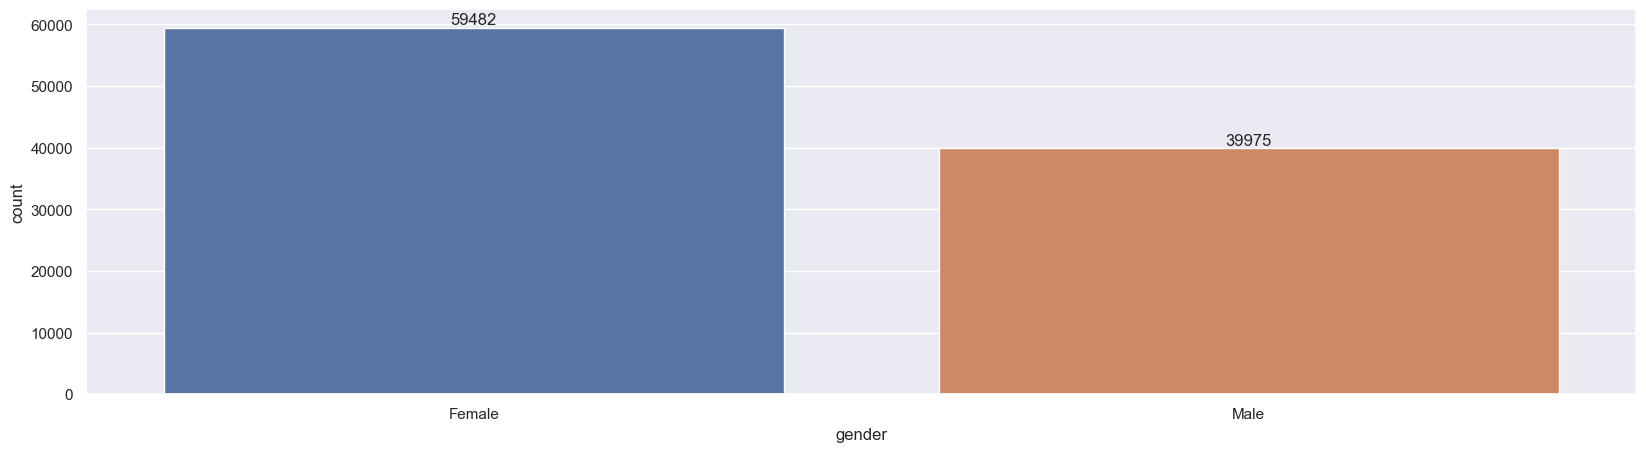

In [93]:
a=sns.countplot(x='gender', data=xy)
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='gender', ylabel='price'>

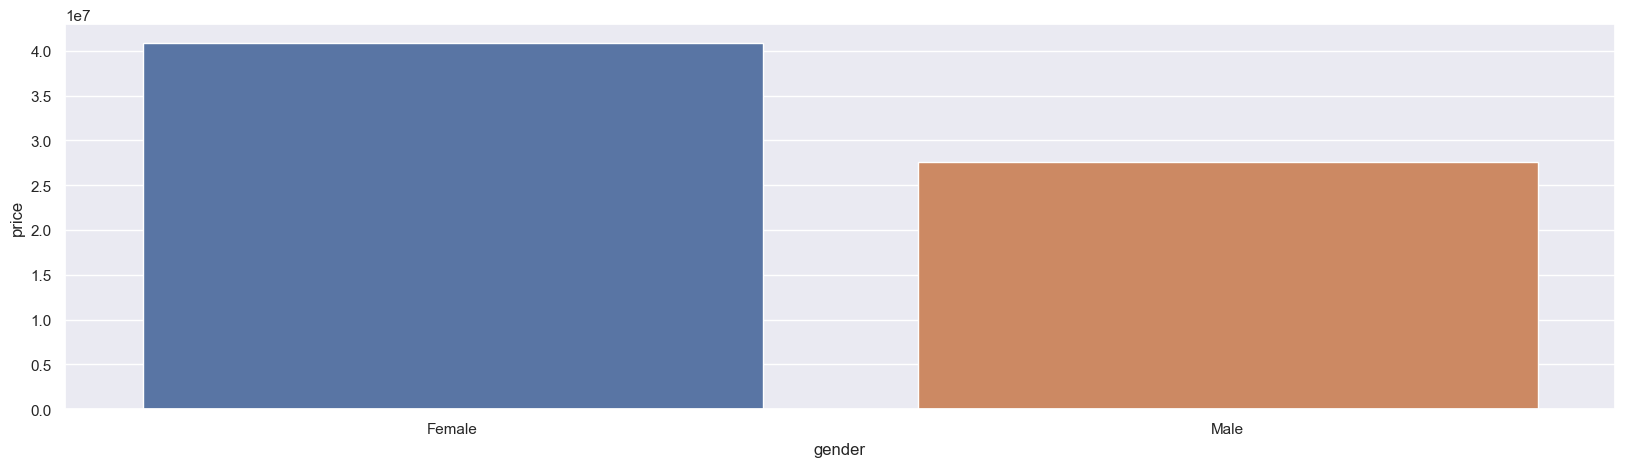

In [94]:
sales_gen = xy.groupby(['gender'], as_index=False)['price'].sum().sort_values(by='price', ascending=False) # type: ignore
sns.barplot(x = 'gender',y= 'price' ,data = sales_gen)

In [95]:
# we saw that Females has spend more money than males

Age

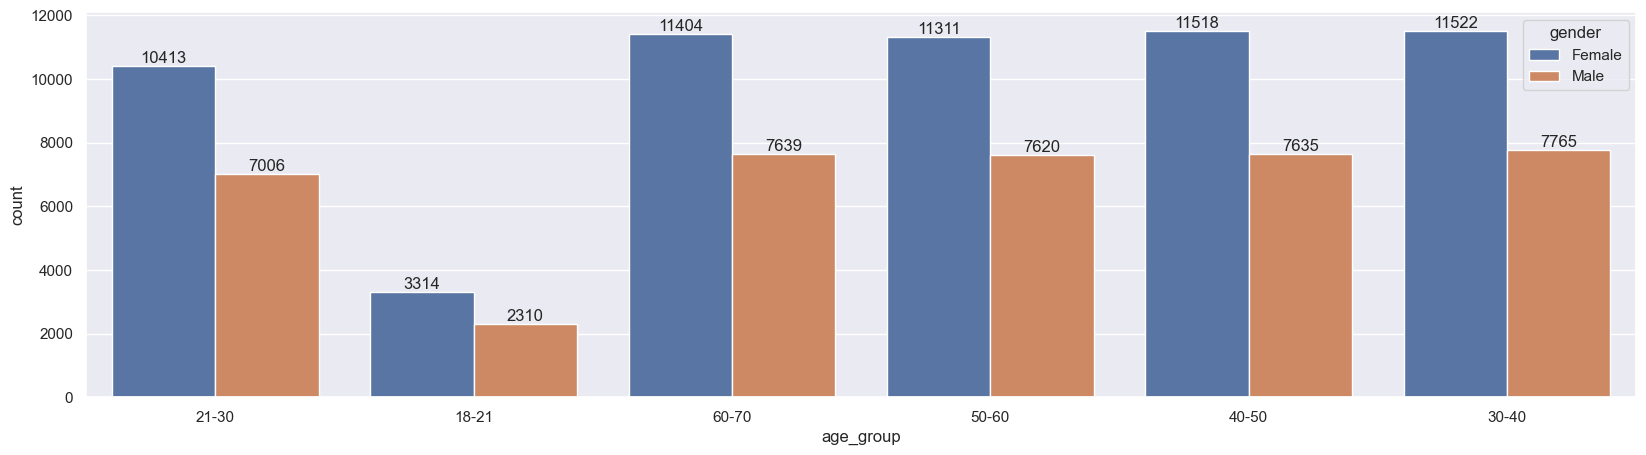

In [96]:
a = sns.countplot(data=xy, x='age_group', hue='gender')
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='age_group', ylabel='price'>

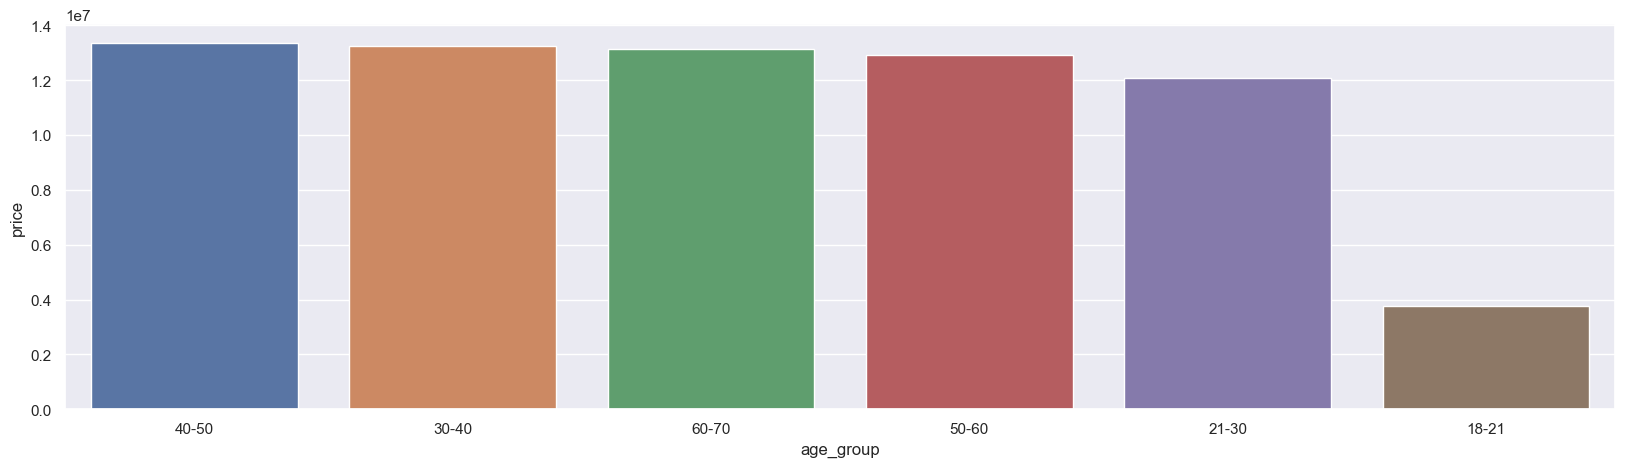

In [97]:
sales_age = xy.groupby(['age_group'], as_index=False)['price'].sum().sort_values(by='price', ascending=False) # type: ignore

sns.barplot(x = 'age_group',y= 'price' ,data = sales_age)

In [98]:
# the age group of 40-50 has purchased more followed by 30-40 and 60-70

Payment Method

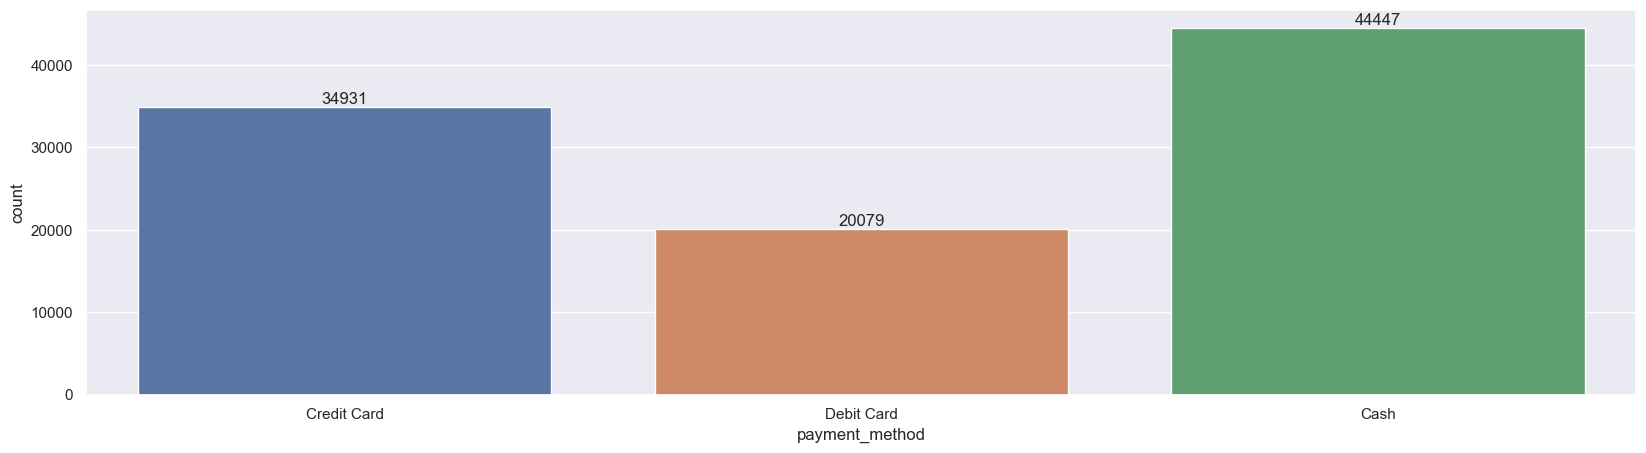

In [99]:
a = sns.countplot(data=xy, x='payment_method')
sns.set(rc={'figure.figsize':(15,5)})
for bars in a.containers:
    a.bar_label(bars)

<Axes: xlabel='payment_method', ylabel='price'>

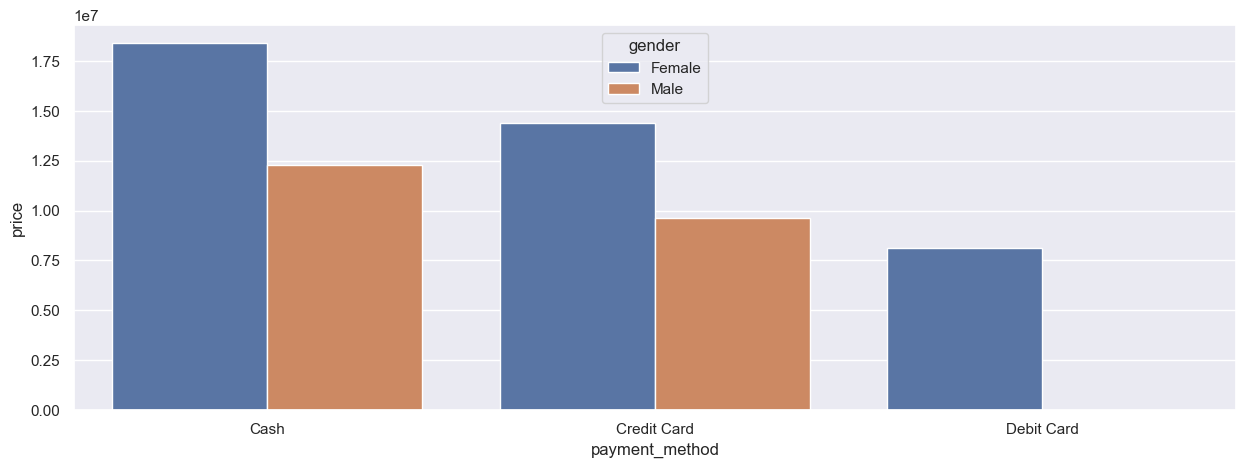

In [100]:
sales_cat = xy.groupby(['payment_method','gender'], as_index=False)['price'].sum().sort_values(by='price', ascending=False).head(5) # type: ignore
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_cat, x = 'payment_method',y= 'price' ,hue = 'gender')

In [101]:
# Most of them preferred Cash payment method and no male purchased using debit card

Month

<Axes: xlabel='month', ylabel='price'>

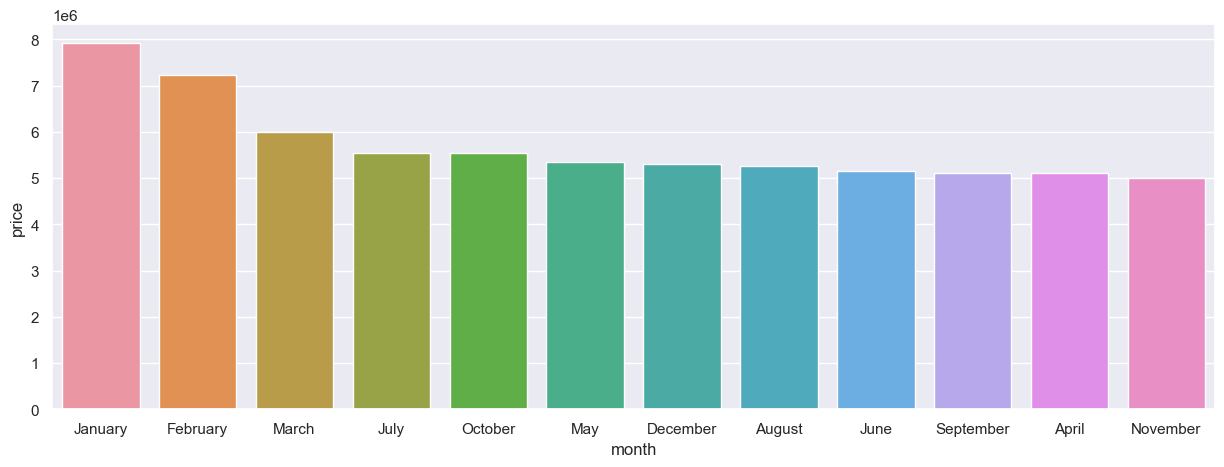

In [102]:
sales_mon = xy.groupby(['month'], as_index=False)['price'].sum().sort_values(by='price', ascending=False) # type: ignore
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'month',y= 'price' ,data = sales_mon)

In [103]:
# january has most sales 

Category

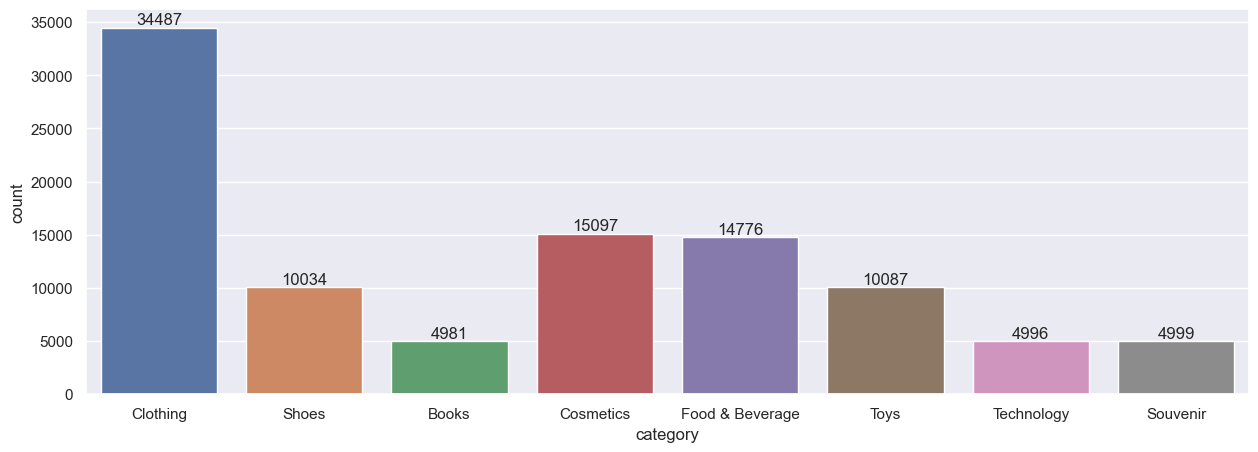

In [104]:
a = sns.countplot(data=xy, x='category',)
sns.set(rc={'figure.figsize':(15,5)})
for bars in a.containers:
    a.bar_label(bars)

In [105]:
# clothing has most sales followed by cosmetics

<Axes: xlabel='category', ylabel='price'>

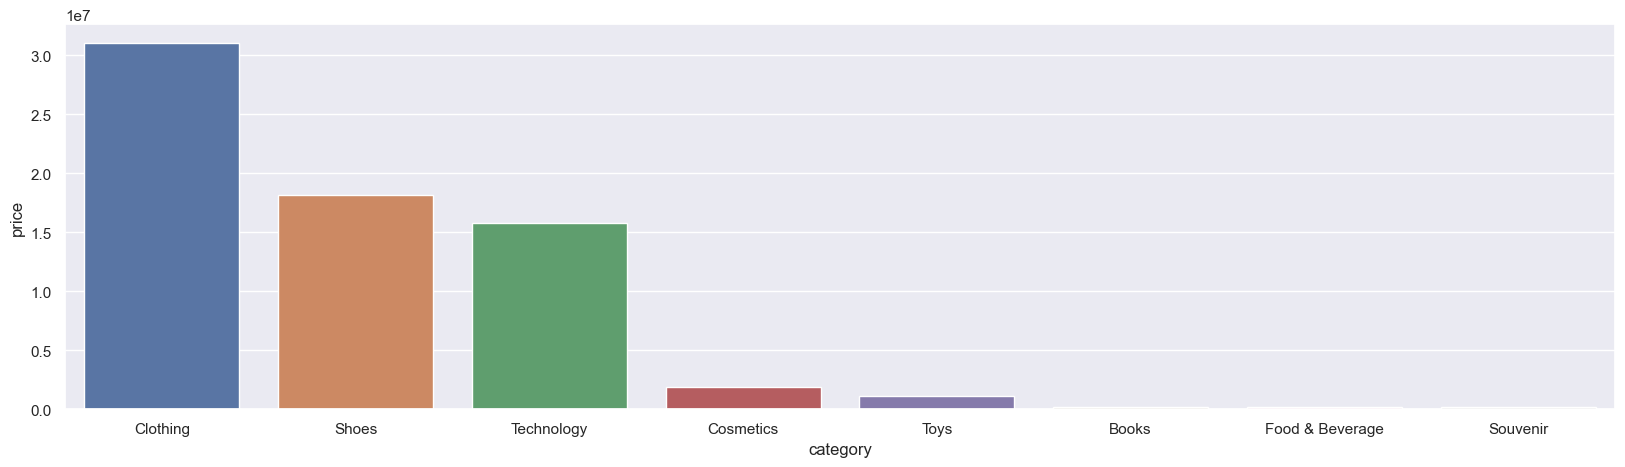

In [106]:
sales_pro = xy.groupby(['category'], as_index=False)['price'].sum().sort_values(by='price', ascending=False) # type: ignore
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'category',y= 'price' ,data = sales_pro)

In [107]:
# clothing has generated most revenue followed by shoes and technology

Location

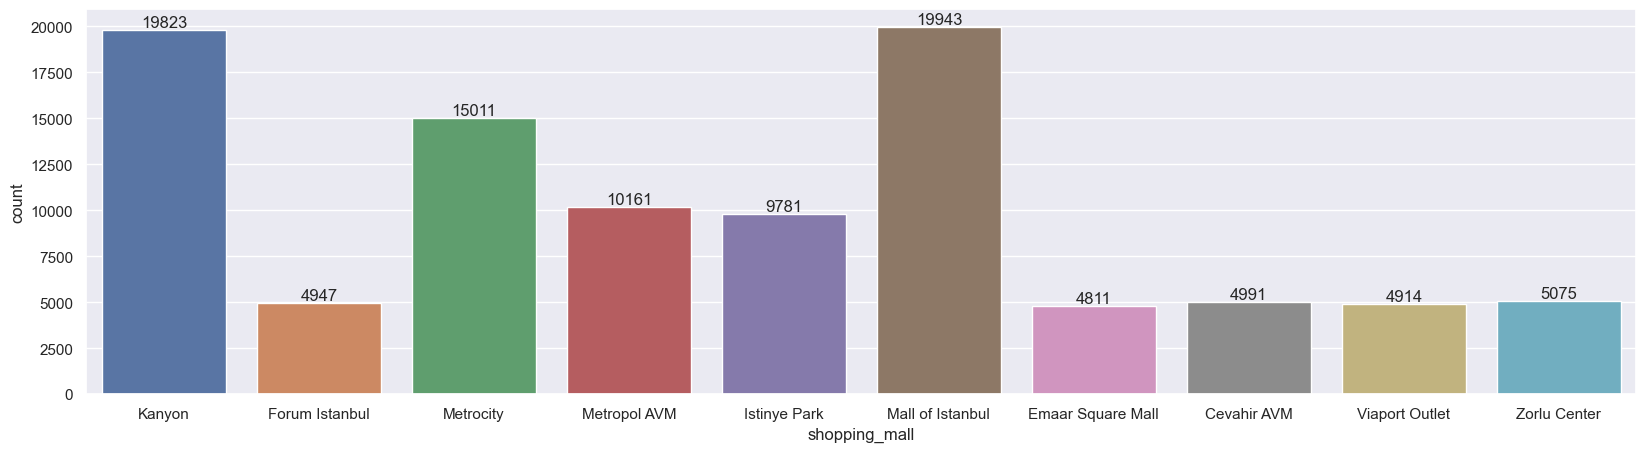

In [108]:
a = sns.countplot(data=xy, x='shopping_mall')
sns.set(rc={'figure.figsize':(25,5)})
for bars in a.containers:
    a.bar_label(bars)

In [109]:
# the shopping mall "Mall of Istanbul" has most sales 

<Axes: xlabel='shopping_mall', ylabel='price'>

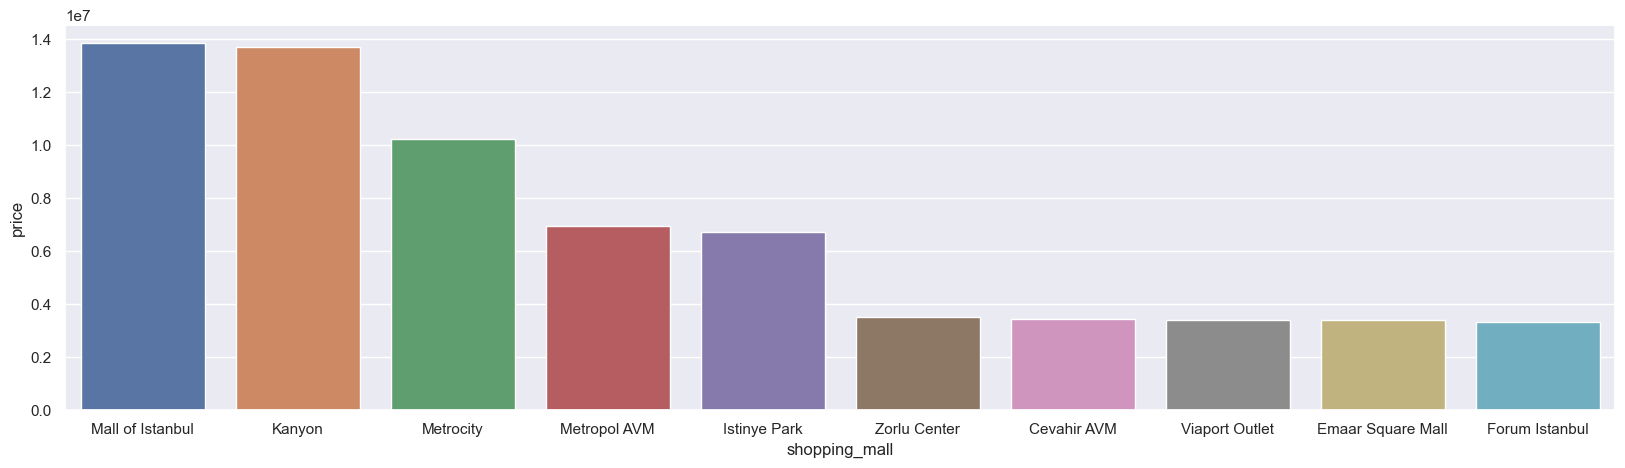

In [110]:
sales_loc = xy.groupby(['shopping_mall'], as_index=False)['price'].sum().sort_values(by='price', ascending=False) # type: ignore
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'shopping_mall',y= 'price' ,data = sales_loc)

In [111]:
# the shopping mall "Mall of Istanbul" has generated most revenue

Quantity-Location

In [112]:
# Filter out non-numeric values in 'shopping_mall' column
xy_numeric = xy[pd.to_numeric(xy['shopping_mall'], errors='coerce').notnull()]

In [113]:
# Convert 'shopping_mall' column to float type
xy_numeric['shopping_mall'] = xy_numeric['shopping_mall'].astype(float)

<Axes: xlabel='shopping_mall', ylabel='quantity'>

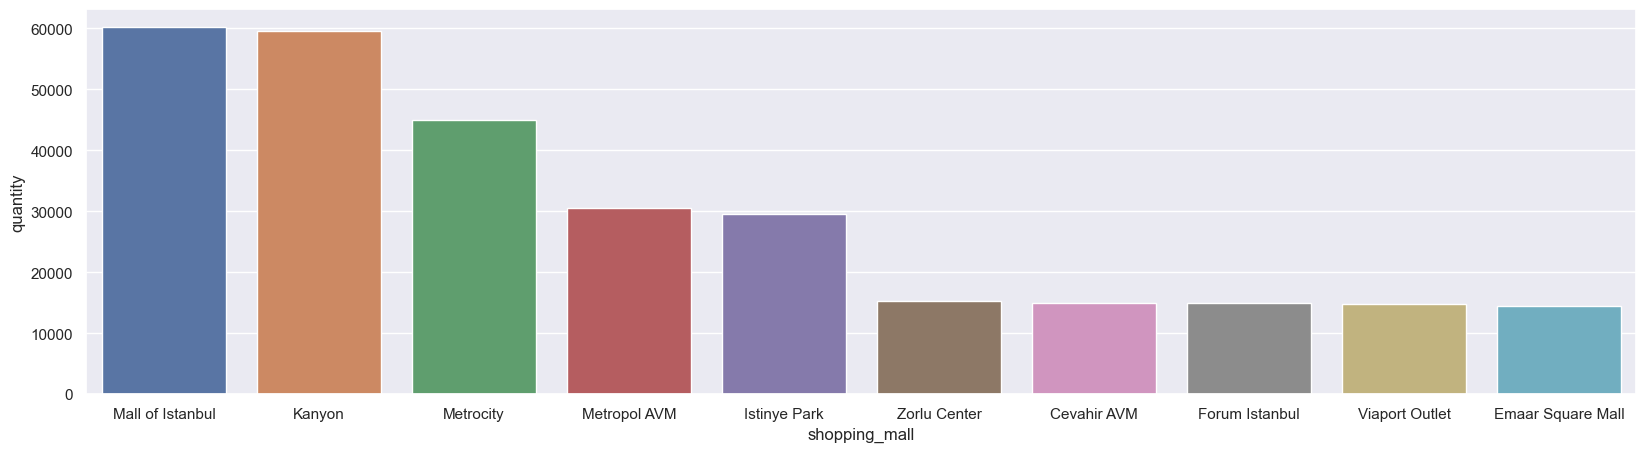

In [114]:
sales_loc = xy.groupby(['shopping_mall'], as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False) # type: ignore
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'shopping_mall',y= 'quantity' ,data = sales_loc)

CONCLUSION


Based on the provided information, it can be concluded that females have spent more money compared to males. Among different age groups, the 40-50 age range had the highest number of purchases, followed by the 30-40 and 60-70 age groups. The preferred payment method for most customers was cash, as no male made purchases using a debit card. In terms of sales, January had the highest number of transactions. The clothing category recorded the highest sales, followed by cosmetics. When it comes to revenue generation, clothing emerged as the top-performing category, followed by shoes and technology. The shopping mall "Mall of Istanbul" had the highest sales and revenue among the mentioned shopping malls.